In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
a = []
while(1):
    a.append('1')

In [0]:
import pandas as pd          
import numpy as np           
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series       
%matplotlib inline 
import warnings    

**Reading all the CSV files and checking the shape and dtypes**

In [0]:
traintrans_data = pd.read_csv('/content/drive/My Drive/PHD/Copy of train_transactions.csv', header=0)

In [0]:
traintrans_data.shape

(71391, 3)

In [0]:
item_data = pd.read_csv("/content/drive/My Drive/PHD/Copy of item_details.csv")
location_data = pd.read_csv("/content/drive/My Drive/PHD/Copy of location_details.csv")

In [0]:
item_data.shape

(4100, 4)

In [0]:
location_data.shape

(54, 5)

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/PHD/Copy of Copy of train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [0]:
train_location = pd.merge(train_data,location_data,left_on="locationId",right_on="location_id")

In [0]:
train_location.head()

,date,locationId,item_id,unit_sales,onpromotion,location_id,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
train_location.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,Kanpur,Uttar Pradesh,D,1


In [0]:
import gc

In [0]:
del[train_data]
gc.collect()

26

In [0]:
gc.collect()

0

In [0]:
train_location.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
city            object
state           object
type            object
cluster          int64
dtype: object

**Converting Requried columns into requried dtypes**

In [0]:
train_location['locationId'] = train_location['locationId'].astype("category")
train_location['onpromotion'] = train_location['onpromotion'].astype("category")
train_location['city'] = train_location['city'].astype("category")
train_location['state'] = train_location['state'].astype("category")
train_location['type'] = train_location['type'].astype("category")
train_location['cluster'] = train_location['cluster'].astype("category")
train_location['item_id'] = train_location['item_id'].astype("category")

**Checking the memory usage of the Data Frame**

In [0]:
train_location.memory_usage(deep=True)

Index           813510232
date           6813148193
locationId      101694934
item_id         203808427
unit_sales      813510232
onpromotion     101688927
city            101690832
state           101690283
type            101689269
cluster         101689555
dtype: int64

In [0]:
train_location.dtypes

date             object
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
city           category
state          category
type           category
cluster        category
dtype: object

In [0]:
gc.collect()

0

In [0]:
train_location.to_pickle('./train_location.pkl')

In [0]:
train_loc1=pd.read_pickle('/content/train_location.pkl')

In [0]:
train_loc1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,Kanpur,Uttar Pradesh,D,1


In [0]:
mem_df_train = train_loc1.memory_usage(index=True).sum()
print("train_loc dataset uses ",mem_df_train/ 1024**2," MB")

train_loc dataset uses  3103.3257904052734  MB


In [0]:
#Optimizing train_loc data; checking for range of values
print(train_loc1.max())
print(train_loc1.min())

date              2018-12-31
locationId        location_9
item_id          item_999547
unit_sales             89440
onpromotion             True
city           Visakhapatnam
state            West Bengal
type                       E
cluster                   17
dtype: object
date               2015-01-01
locationId         location_1
item_id          item_1000866
unit_sales             -15372
onpromotion             False
city                Ahmedabad
state          Andhra Pradesh
type                        A
cluster                     1
dtype: object


**Merging All the Files**

In [0]:
item_data = pd.read_csv("/content/drive/My Drive/PHD/Copy of item_details.csv")
location_data = pd.read_csv("/content/drive/My Drive/PHD/Copy of location_details.csv")

In [0]:
item_data['item_id'] = item_data['item_id'].astype("category")
item_data['category_of_item'] = item_data['category_of_item'].astype("category")
item_data['class'] = item_data['class'].astype("category")
item_data['perishable'] = item_data['perishable'].astype("category")

In [0]:
train_loc_item = pd.merge(train_loc1,item_data,left_on="item_id",right_on="item_id")

In [0]:
train_loc_item.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-02,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2015-01-04,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
3,2015-01-05,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
4,2015-01-06,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


In [0]:
import pandas as pd

data = pd.read_pickle('/content/drive/My Drive/PHD/train_loc_item.pkl')

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-02,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2015-01-04,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
3,2015-01-05,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
4,2015-01-06,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


In [0]:
data.shape

(101688779, 12)

**Checking the NULL values column wise**

In [0]:
data.isna().sum()

date                       0
locationId                 0
item_id                    0
unit_sales                 0
onpromotion         21657651
city                       0
state                      0
type                       0
cluster                    0
category_of_item           0
class                      0
perishable                 0
dtype: int64

In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
onpromotion,21657651,0.21298
perishable,0,0.00000
class,0,0.00000
category_of_item,0,0.00000
cluster,0,0.00000


In [0]:
data.onpromotion.value_counts(normalize=True)

False    0.936762
True     0.063238
Name: onpromotion, dtype: float64

In [0]:
data['date'] = pd.to_datetime(data.date)

In [0]:
data.dtypes

date                datetime64[ns]
locationId                category
item_id                     object
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

**Sorting the Data Frame with date**

In [0]:
data = data.sort_values(by='date')

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
23367145,2015-01-01,location_25,item_1009998,1.0,NaN,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3024,0
23401240,2015-01-01,location_25,item_1014865,9.0,NaN,Kanpur,Uttar Pradesh,D,1,dairy_items,class_2108,1
23452658,2015-01-01,location_25,item_1020237,1.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,class_1330,0
23459190,2015-01-01,location_25,item_1028589,17.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,class_1318,0


In [0]:
data = data.reset_index(drop=True)

In [0]:
data.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-01,location_25,item_1009998,1.0,NaN,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3024,0
2,2015-01-01,location_25,item_1014865,9.0,NaN,Kanpur,Uttar Pradesh,D,1,dairy_items,class_2108,1
3,2015-01-01,location_25,item_1020237,1.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,class_1330,0
4,2015-01-01,location_25,item_1028589,17.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,class_1318,0


In [0]:
data['item_id'] = data['item_id'].astype("category")

# **Memory Optimization**

In [0]:
import re
location  = r'location_'
data['locationId'] = [re.sub(location, '', text) for text in data['locationId']]
data['locationId'][0]

'25'

In [0]:
import re
item_id  = r'item_'
data['item_id'] = [re.sub(item_id, '', text) for text in data['item_id']]
data['item_id'][0]

'103665'

In [0]:
import re
clas  = r'class_'
data['class'] = [re.sub(clas, '', text) for text in data['class']]
data['class'][0]

'2712'

In [0]:
data.dtypes

date                datetime64[ns]
locationId                  object
item_id                     object
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                       object
perishable                category
dtype: object

In [0]:
data.memory_usage(deep=True)

Index                      128
date                 813510232
locationId          5977812398
item_id             6452724727
unit_sales           813510232
onpromotion          101688927
city                 101690832
state                101690283
type                 101689269
cluster              101689555
category_of_item     101692204
class               6203015519
perishable           101688875
dtype: int64

In [0]:
data['item_id'] = data['item_id'].astype("category")
data['locationId'] = data['locationId'].astype("category")
data['class'] = data['class'].astype('category')

In [0]:
data.memory_usage(deep=True)

Index                     128
date                813510232
locationId          101694457
item_id             203788977
unit_sales          813510232
onpromotion         101688927
city                101690832
state               101690283
type                101689269
cluster             101689555
category_of_item    101692204
class               203407806
perishable          101688875
dtype: int64

In [0]:
data1.describe()

,unit_sales
count,1.016888e+08
mean,8.647890e+00
std,2.349533e+01
min,-1.537200e+04
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,8.944000e+04


In [0]:
#Imputing the Negative values with Zero
import numpy as np
data1['unit_sales'] = np.where((data1.unit_sales <= 0),0,data1.unit_sales)

In [0]:
data1.describe()

,unit_sales
count,1.016888e+08
mean,8.649051e+00
std,2.342087e+01
min,0.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,8.944000e+04


In [0]:
data1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,25,103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,2712,1
1,2015-01-01,25,1009998,1.0,NaN,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,3024,0
2,2015-01-01,25,1014865,9.0,NaN,Kanpur,Uttar Pradesh,D,1,dairy_items,2108,1
3,2015-01-01,25,1020237,1.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,1330,0
4,2015-01-01,25,1028589,17.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,1318,0


In [0]:
data.to_pickle('/content/drive/My Drive/PHD/data.pkl')

In [0]:
import pandas as pd

data1=pd.read_pickle('/content/drive/My Drive/PHD/data.pkl')

# **EDA**

In [0]:
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings

# ***Category of item***

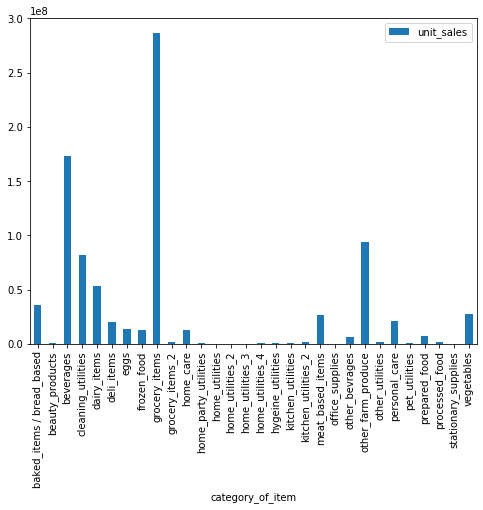

In [0]:
data1.groupby('category_of_item').sum().plot(kind="bar",figsize=(8,6))

***Grocery Items having more sales ***

In [0]:
from google.colab import files
from IPython.display import Image

In [0]:
uploaded = files.upload()

Saving Picture1.png to Picture1.png


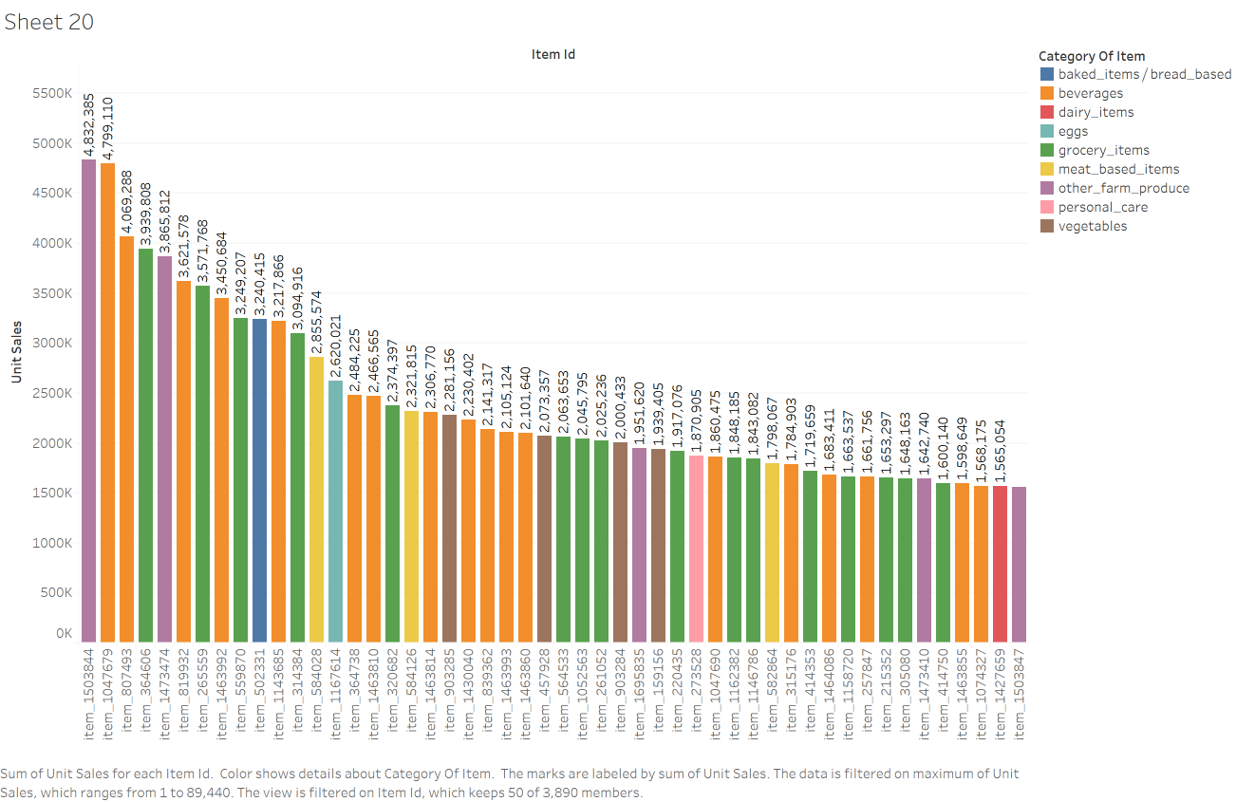

In [0]:
Image("Picture1.png", width=800)

**From this graph we can infer that top selling items which are belonging to different category of items**

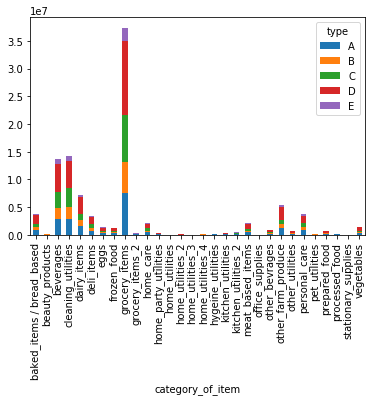

In [0]:
category=pd.crosstab(data1['category_of_item'],data1['type']) 
category.plot.bar(stacked=True)

# ***Type Of Business***

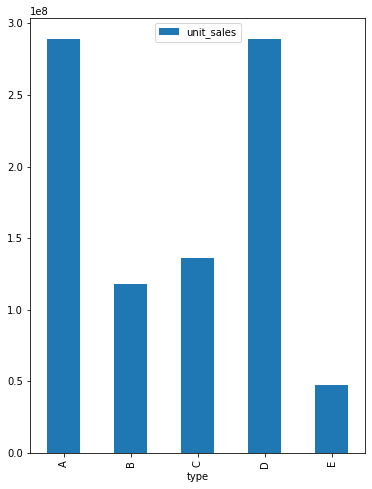

In [0]:
data1.groupby('type').sum().plot(kind="bar",figsize=(6,8))

**Type D is having more sales than Type A Business**

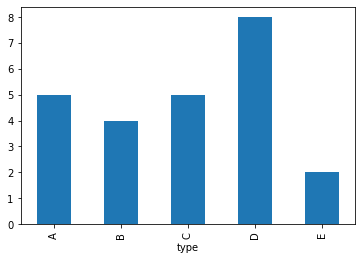

In [0]:
location=pd.crosstab(data1['cluster'],data1['type']).nunique()
location
location.plot.bar()
plt.show()

In [0]:
location

type
A    5
B    4
C    5
D    8
E    2
dtype: int64

***Type D is having more clusters ***

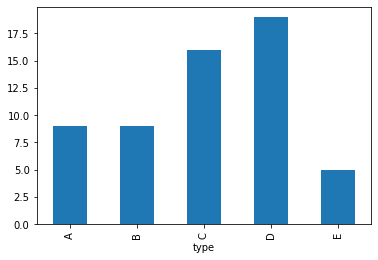

In [0]:
location1=pd.crosstab(data1['locationId'],data1['type']).nunique()
location1.plot.bar()
plt.show()

In [0]:
location1

type
A     9
B     9
C    16
D    19
E     5
dtype: int64

**More locations are doing business in Type D**

In [0]:
uploaded = files.upload()

Saving Picture2.png to Picture2.png


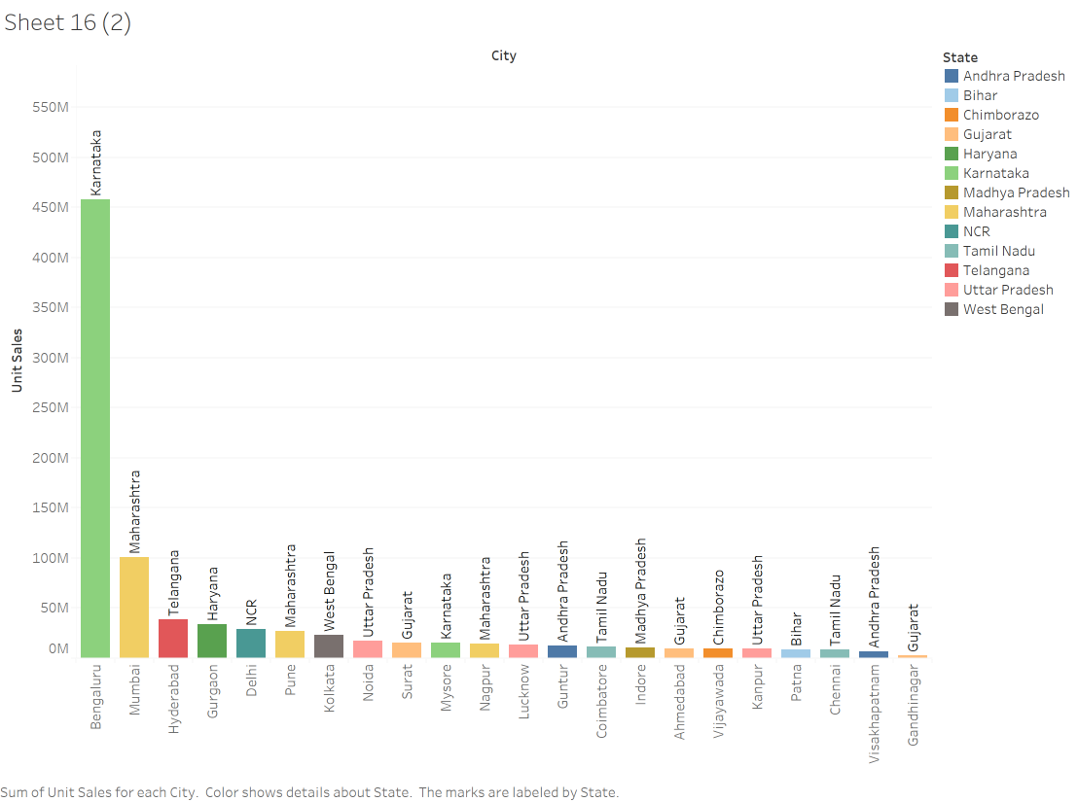

In [0]:
Image("Picture2.png", width=800)

In [0]:
location2=pd.crosstab(data1['state'],data1['type']).nunique()
location2

type
A     4
B     6
C    11
D     9
E     4
dtype: int64

**From this we infer that Bengaluru from Karnataka is contributing  more sales**

# **Perishable**

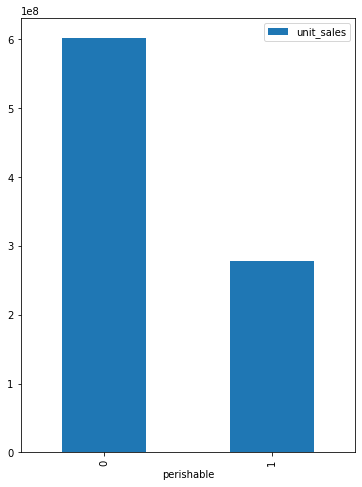

In [0]:
data1.groupby('perishable').sum().plot(kind="bar",figsize=(6,8))

# **Cluster**

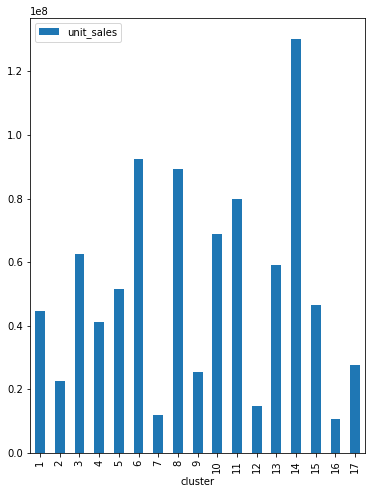

In [0]:
data1.groupby('cluster').sum().plot(kind="bar",figsize=(6,8))

***Cluster 14 having more unit sales ***

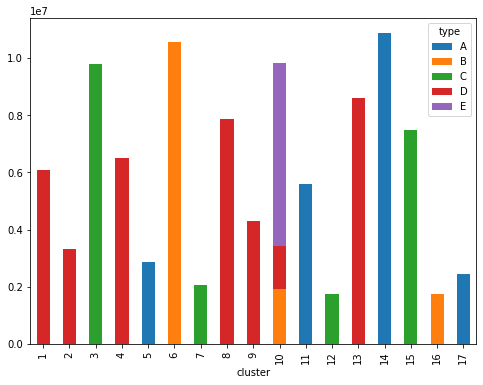

In [0]:
cluster1=pd.crosstab(data1['cluster'],data1['type']) 
cluster1.plot(kind="bar", stacked=True, figsize=(8,6))

**For the most part, cluster have one type. However, there is one exception. Cluster 10 can be type B, D, and E.**

In [0]:
cluster=pd.crosstab(data1['state'],data1['cluster']).nunique()
cluster

cluster
1     4
2     2
3     6
4     4
5     2
6     6
7     3
8     2
9     3
10    4
11    2
12    2
13    3
14    3
15    5
16    2
17    2
dtype: int64

In [0]:
data1.to_csv('./data1.csv')

# **LocationId**

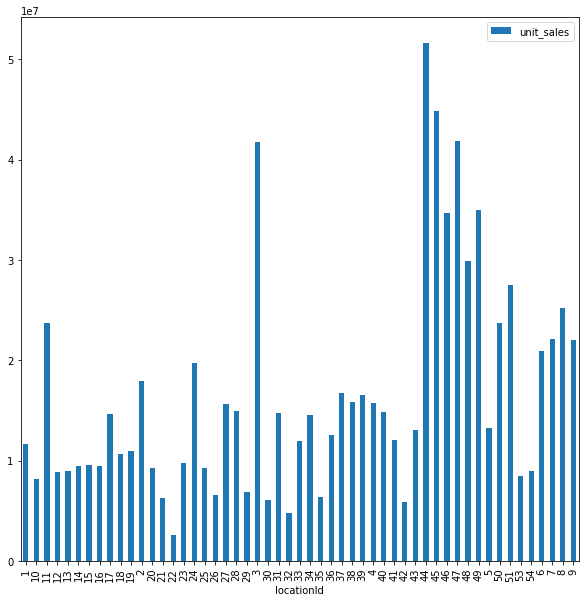

In [0]:
data1.groupby('locationId').sum().plot(kind="bar",figsize=(10,10))

**Location 44 is having More unit sales**

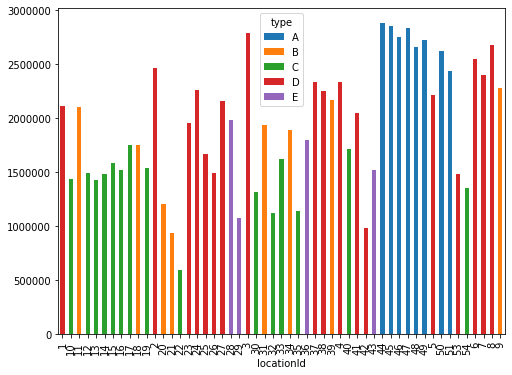

In [0]:
cluster=pd.crosstab(data1['locationId'],data1['type']) 
cluster.plot(kind="bar", stacked=True, figsize=(8,6))

**From this we can infer that which location is having which type of Business**

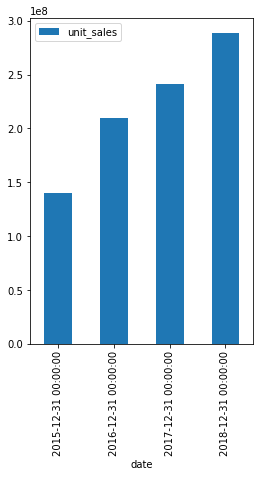

In [0]:
gr = data1.groupby(pd.Grouper(key='date', freq='Y')).sum()
gr.plot(kind="bar",figsize=(4,6))

**Every Year There is increase in unit sales.**

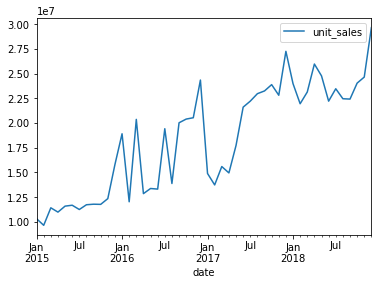

In [0]:
gr = data1.groupby(pd.Grouper(key='date', freq='M')).sum()
gr.plot()

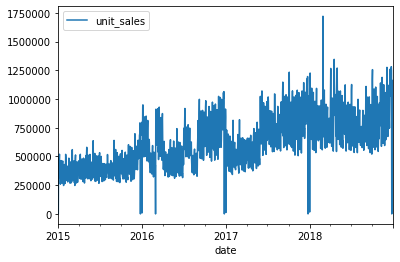

In [0]:
gr = data1.groupby(pd.Grouper(key='date', freq='D')).sum()
gr.plot()

# **Filtered data**

In [0]:
data_filtered = data1[data1['date'] >= '2017-01-01']

In [0]:
data_filtered.shape

(63094515, 12)

In [0]:
data_filtered.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

In [0]:
data_filtered.describe

,unit_sales
count,6.309452e+07
mean,8.392191e+00
std,2.524690e+01
min,-1.537200e+04
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,8.944000e+04


In [0]:
import numpy as np

data_filtered['unit_sales'] = np.where((data_filtered.unit_sales <= 0),0,data_filtered.unit_sales)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
data_filtered.describe()

,unit_sales
count,6.309452e+07
mean,8.393650e+00
std,2.513872e+01
min,0.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,8.944000e+04


In [0]:
data_filtered.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Month,Day
38594264,2017-01-01,25,1156724,7.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,1028,0,1,1
38594265,2017-01-01,25,315178,28.0,False,Kanpur,Uttar Pradesh,D,1,beverages,1124,0,1,1
38594266,2017-01-01,25,527757,4.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,1032,0,1,1
38594267,2017-01-01,25,953413,1.0,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,3046,0,1,1
38594268,2017-01-01,25,1299616,4.0,False,Kanpur,Uttar Pradesh,D,1,dairy_items,2174,1,1,1


## **EDA**

In [0]:
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings

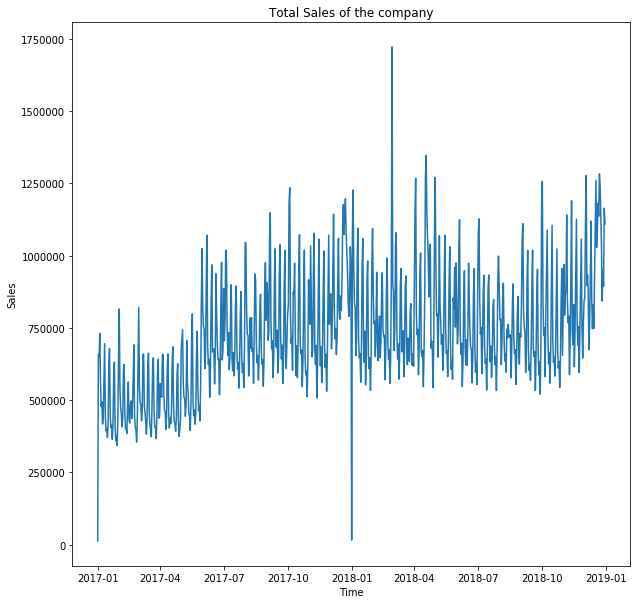

In [0]:
ts=data_filtered.groupby(["date"])["unit_sales"].sum()
ts.astype('float')
plt.figure(figsize=(10,10))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

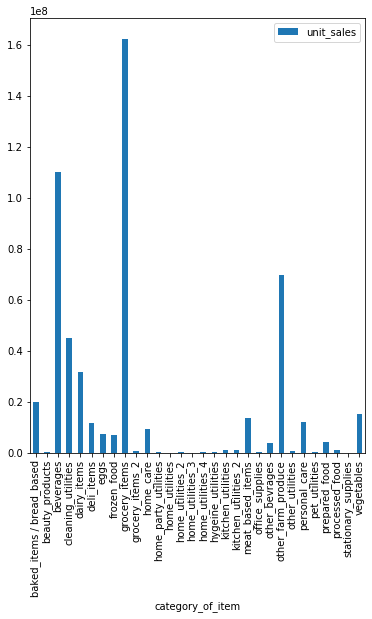

In [0]:
data_filtered.groupby('category_of_item').sum().plot(kind="bar",figsize=(6,8))

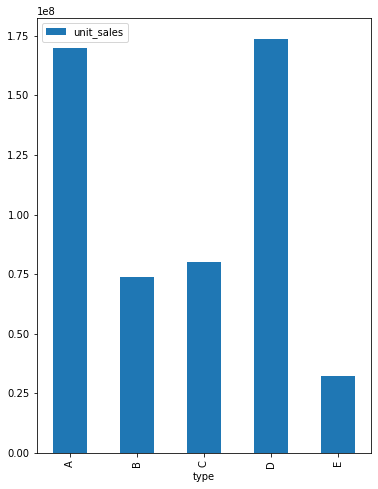

In [0]:
data_filtered.groupby('type').sum().plot(kind="bar",figsize=(6,8))

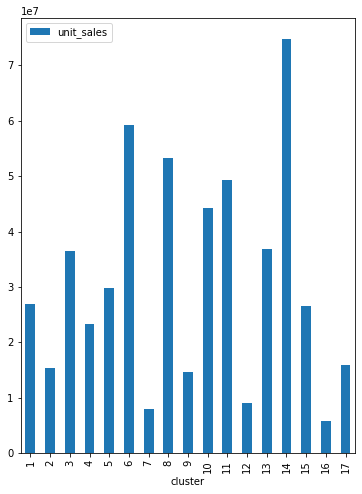

In [0]:
data_filtered.groupby('cluster').sum().plot(kind="bar",figsize=(6,8))

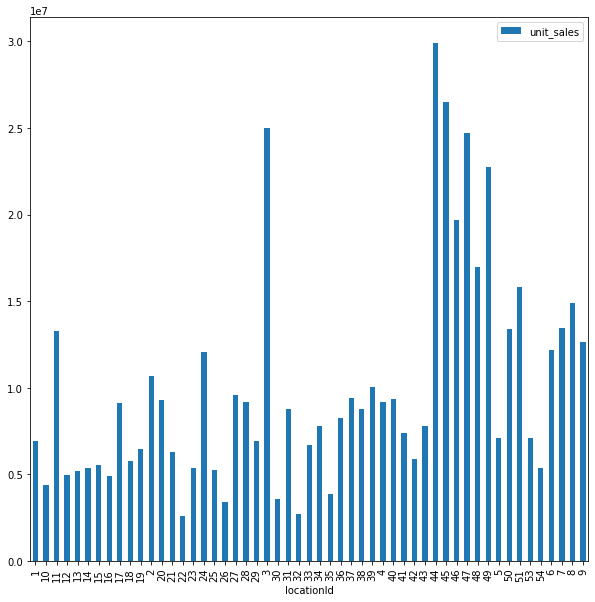

In [0]:
data_filtered.groupby('locationId').sum().plot(kind="bar",figsize=(10,10))

In [0]:
#data_filtered['Year'] = data_final3['date'].dt.year
data_filtered['Month'] = data_filtered['date'].dt.month
data_filtered['Day'] = data_filtered['date'].dt.day
#data_final3['Day_of_Week'] = pd.to_datetime(data_final3['date']).dt.weekday_name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data_filtered['category_of_item'] = data_filtered['category_of_item'].replace(['home_care','meat_based_items','vegetables','frozen_food','eggs','other_bevrages','prepared_food',
                                 'other_utilities','kitchen_utilities_2','kitchen_utilities','home_party_utilities','hygeine_utilities'
                                 'home_utilities_4','grocery_items_2','processed_food','beauty_products','pet_utilities'
                                 'home_utilities_2','office_supplies','home_utilities','home_utilities_3','stationary_supplies'], 'other_items')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
data_filtered['category_of_item'] = data_filtered['category_of_item'].replace(['hygeine_utilities','home_utilities_4','pet_utilities','home_utilities_2'],'other_items')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
import gc
gc.collect()

23

In [0]:
data_filtered['category_of_item']=data_filtered['category_of_item'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data_filtered.dtypes

locationId          category
item_id             category
unit_sales           float64
onpromotion         category
city                category
state               category
type                category
cluster             category
category_of_item    category
class               category
perishable          category
Month                  int64
Day                    int64
dtype: object

In [0]:
col_cat=data_filtered.select_dtypes(include=['category'])

In [0]:
col_cat.head()

,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
38594264,25,1156724,False,Kanpur,Uttar Pradesh,D,1,grocery_items,1028,0
38594265,25,315178,False,Kanpur,Uttar Pradesh,D,1,beverages,1124,0
38594266,25,527757,False,Kanpur,Uttar Pradesh,D,1,grocery_items,1032,0
38594267,25,953413,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,3046,0
38594268,25,1299616,False,Kanpur,Uttar Pradesh,D,1,dairy_items,2174,1


In [0]:
col_cat.drop(["locationId","item_id","city","state", "class"],axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
col_cat.head()

,onpromotion,type,cluster,category_of_item,perishable
38594264,False,D,1,grocery_items,0
38594265,False,D,1,beverages,0
38594266,False,D,1,grocery_items,0
38594267,False,D,1,cleaning_utilities,0
38594268,False,D,1,dairy_items,1


In [0]:
cat_col=col_cat.columns

In [0]:
cat_col

Index(['onpromotion', 'type', 'cluster', 'category_of_item', 'perishable'], dtype='object')

In [0]:
data_dumies = pd.get_dummies(columns=cat_col,data=col_cat,drop_first=False)

In [0]:
data_dumies.head()

,onpromotion_False,onpromotion_True,type_A,type_B,type_C,type_D,type_E,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,category_of_item_baked_items / bread_based,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_grocery_items,category_of_item_other_farm_produce,category_of_item_other_items,category_of_item_personal_care,perishable_0,perishable_1
38594264,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
38594265,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
38594266,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
38594267,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
38594268,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
col_num=data_filtered.select_dtypes(include=['float64'])
col_num2=data_filtered.select_dtypes(include=['int64'])

In [0]:
col_num.head()

,unit_sales
38594264,7.0
38594265,28.0
38594266,4.0
38594267,1.0
38594268,4.0


In [0]:
col_num2.head()

,Month,Day
38594264,1,1
38594265,1,1
38594266,1,1
38594267,1,1
38594268,1,1


In [0]:
final_data=pd.concat([col_num,col_num2,data_dumies],axis=1)

In [0]:
final_data.head()

,unit_sales,Month,Day,onpromotion_False,onpromotion_True,type_A,type_B,type_C,type_D,type_E,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,category_of_item_baked_items / bread_based,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_grocery_items,category_of_item_other_farm_produce,category_of_item_other_items,category_of_item_personal_care,perishable_0,perishable_1
38594264,7.0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
38594265,28.0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
38594266,4.0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
38594267,1.0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
38594268,4.0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
final_data.to_pickle('/content/drive/My Drive/PHD/final_data.pkl')

In [0]:
import pandas as pd

final_data=pd.read_pickle("/content/drive/My Drive/PHD/final_data.pkl")

In [0]:
#X = final_data.loc[:,final_data.columns!='unit_sales'].values
#Y = final_data.loc[:,'unit_sales'].values
#print('X.shape: ', X.shape)
#print('Y.shape: ', Y.shape)

X.shape:  (63094515, 37)
Y.shape:  (63094515,)


In [0]:
#from sklearn.model_selection import train_test_split

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [0]:
sub_data= data1[(data1['date'].dt.month == 1 ) & (data1['date'].dt.day <= 31)]

In [15]:
sub_data.shape

(7726971, 12)

In [10]:
sub_data.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,25,103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,2712,1
1,2015-01-01,25,1009998,1.0,NaN,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,3024,0
2,2015-01-01,25,1014865,9.0,NaN,Kanpur,Uttar Pradesh,D,1,dairy_items,2108,1
3,2015-01-01,25,1020237,1.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,1330,0
4,2015-01-01,25,1028589,17.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,1318,0


In [11]:
sub_data.tail()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
69282588,2018-01-31,32,1929797,7.0,False,Mumbai,Maharashtra,C,3,grocery_items,1016,0
69282589,2018-01-31,43,308924,1.0,False,Lucknow,Uttar Pradesh,E,10,cleaning_utilities,3004,0
69282590,2018-01-31,2,730258,18.0,False,Bengaluru,Karnataka,D,13,beverages,1122,0
69282591,2018-01-31,35,765519,2.0,False,Visakhapatnam,Andhra Pradesh,C,3,grocery_items,1084,0
69282592,2018-01-31,9,1394348,8.0,False,Bengaluru,Karnataka,B,6,cleaning_utilities,3008,0


In [12]:
sub_data.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

In [14]:
sub_data.describe()

,unit_sales
count,7.726971e+06
mean,8.815066e+00
std,1.866186e+01
min,-1.700000e+02
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,1.000000e+04


In [16]:
import numpy as np
sub_data['unit_sales'] = np.where((sub_data.unit_sales <= 0),0,sub_data.unit_sales)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
sub_data.describe()

,unit_sales
count,7.726971e+06
mean,8.815543e+00
std,1.866094e+01
min,0.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,1.000000e+04


In [31]:
sub_data.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Day_of_week
0,2015-01-01,25,103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,2712,1,3
1,2015-01-01,25,1009998,1.0,NaN,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,3024,0,3
2,2015-01-01,25,1014865,9.0,NaN,Kanpur,Uttar Pradesh,D,1,dairy_items,2108,1,3
3,2015-01-01,25,1020237,1.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,1330,0,3
4,2015-01-01,25,1028589,17.0,NaN,Kanpur,Uttar Pradesh,D,1,other_bevrages,1318,0,3


In [32]:
sub_data.drop(['Day_of_week'], axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
sub_data['category_of_item'] = sub_data['category_of_item'].replace(['home_care','meat_based_items','vegetables','frozen_food','eggs','other_bevrages','prepared_food',
                                 'other_utilities','kitchen_utilities_2','kitchen_utilities','home_party_utilities','hygeine_utilities'
                                 'home_utilities_4','grocery_items_2','processed_food','beauty_products','pet_utilities'
                                 'home_utilities_2','office_supplies','home_utilities','home_utilities_3','stationary_supplies'], 'other_items')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
sub_data['category_of_item'] = sub_data['category_of_item'].replace(['hygeine_utilities','home_utilities_4','pet_utilities','home_utilities_2'],'other_items')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
sub_data['category_of_item']=sub_data['category_of_item'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
sub_data.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

In [0]:
sub_data.to_pickle('/content/drive/My Drive/PHD/sub_data.pkl')

In [0]:
col_cat=sub_data.select_dtypes(include=['category'])

In [39]:
col_cat.columns

Index(['locationId', 'item_id', 'onpromotion', 'city', 'state', 'type',
       'cluster', 'category_of_item', 'class', 'perishable'],
      dtype='object')

In [40]:
col_cat.drop(["locationId","item_id","city","state", "class"],axis=1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
col_cat.head()

,onpromotion,type,cluster,category_of_item,perishable
0,NaN,D,1,baked_items / bread_based,1
1,NaN,D,1,cleaning_utilities,0
2,NaN,D,1,dairy_items,1
3,NaN,D,1,other_items,0
4,NaN,D,1,other_items,0


In [44]:
sub_data['onpromotion'] = sub_data['onpromotion'].fillna(2)
sub_data['onpromotion'] = sub_data['onpromotion'].replace(True,1)
sub_data['onpromotion'] = sub_data['onpromotion'].replace(False,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [46]:
sub_data.onpromotion.nunique()

2

In [0]:
cat_col=col_cat.columns

In [48]:
cat_col

Index(['onpromotion', 'type', 'cluster', 'category_of_item', 'perishable'], dtype='object')

In [0]:
data_dumies = pd.get_dummies(columns=cat_col,data=col_cat,drop_first=True)

In [52]:
data_dumies.head()

,onpromotion_True,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_grocery_items,category_of_item_other_farm_produce,category_of_item_other_items,category_of_item_personal_care,perishable_1
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
col_num=sub_data.select_dtypes(include=['float64'

In [0]:
del col_num2

In [56]:
sub_data.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion                  int64
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

In [54]:
col_num.head()

,unit_sales
0,7.0
1,1.0
2,9.0
3,1.0
4,17.0


In [0]:
final_data=pd.concat([col_num,data_dumies],axis=1)

In [62]:
final_data.head()

,unit_sales,onpromotion_True,type_B,type_C,type_D,type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_grocery_items,category_of_item_other_farm_produce,category_of_item_other_items,category_of_item_personal_care,perishable_1
0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
final_data.shape

(7726971, 31)

In [64]:
X = final_data.loc[:,final_data.columns!='unit_sales'].values
Y = final_data.loc[:,'unit_sales'].values
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (7726971, 30)
Y.shape:  (7726971,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [0]:
from sklearn.linear_model import LinearRegression

In [70]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_test)

In [0]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_train - y_train_pred) / y_train)) 

In [102]:
print('Training mape: ', MAPE(y_train, y_train_pred))
print('Validation mape: ', MAPE(y_test, y_val_pred))

Training mape:  inf
Validation mape:  inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [0]:
from sklearn.metrics import mean_absolute_error

In [82]:
mean_absolute_error(y_train,y_train_pred)

7.5220162574790335

In [84]:
mean_absolute_error(y_test,y_val_pred)

7.518165964953573

# **TEST DATA**

In [0]:
test_data=pd.read_csv("/content/drive/My Drive/PHD/test.csv")

In [104]:
test_data.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [105]:
test_data.tail()

,id,date,locationId,item_id,onpromotion
1482290,1482290,2019-01-15,location_54,item_2048381,False
1482291,1482291,2019-01-15,location_54,item_2048421,False
1482292,1482292,2019-01-15,location_54,item_2048471,False
1482293,1482293,2019-01-15,location_54,item_2048515,False
1482294,1482294,2019-01-15,location_54,item_2048674,False
